In [1]:
using Plots
using DifferentialEquations

In [2]:
f(u, p, t) = 0.98u
u0 = 1.0
tspan = (0.0, 1.0)

(0.0, 1.0)

In [3]:
?ODEProblem

search: ODEProblem RODEProblem SplitODEProblem DynamicalODEProblem



```julia
struct ODEProblem{uType, tType, isinplace, P, F, K, PT} <: SciMLBase.AbstractODEProblem{uType, tType, isinplace}
```

Defines an ODE problem.

# Fields

  * `f`

    The ODE is `du/dt = f(u,p,t)`.
  * `u0`

    The initial condition is `u(tspan[1]) = u0`.
  * `tspan`

    The solution `u(t)` will be computed for `tspan[1] ≤ t ≤ tspan[2]`.
  * `p`

    Constant parameters to be supplied as the second argument of `f`.
  * `kwargs`

    A callback to be applied to every solver which uses the problem.
  * `problem_type`

---

```
ODEProblem(f::ODEFunction,u0,tspan,p=NullParameters(),callback=CallbackSet())
```

Define an ODE problem from an [`ODEFunction`](@ref).


In [4]:
prob = ODEProblem(f, u0, tspan)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 1.0)
u0: 1.0

In [5]:
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 5-element Vector{Float64}:
 0.0
 0.10042494449239292
 0.35218603951893646
 0.6934436334555072
 1.0
u: 5-element Vector{Float64}:
 1.0
 1.1034222047865465
 1.4121908848175448
 1.9730384867968267
 2.664456142481423

In [6]:
function plot_(sol)
    function new_plot()
        plot(xlabel = "x", ylabel = "f(x)",
        xlims = (0,Inf), ylims = (-Inf, 1))
    end 
    p = new_plot()
    plot!(p, sol,linewidth=5,title="Comparison",
         xaxis="Time (t)",yaxis="u(t) (in μm)",label="Solved ODE") # legend=false

    plot!(p, sol.t,t->1.0*exp(0.98t),lw=3,ls=:dash,label="True Solution!")
end

plot_ (generic function with 1 method)

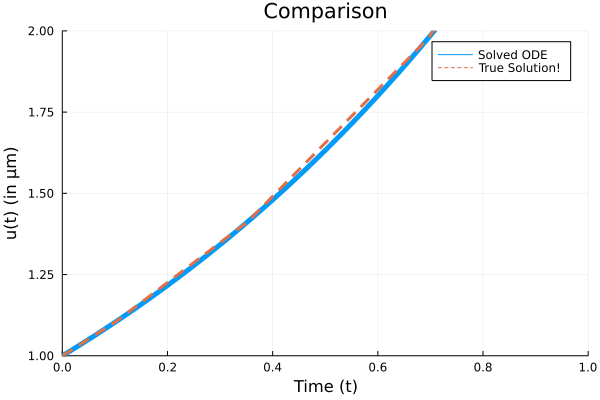

In [7]:
plot_(sol)

In [8]:
sol.t, sol.u

([0.0, 0.10042494449239292, 0.35218603951893646, 0.6934436334555072, 1.0], [1.0, 1.1034222047865465, 1.4121908848175448, 1.9730384867968267, 2.664456142481423])

In [9]:
sol

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 5-element Vector{Float64}:
 0.0
 0.10042494449239292
 0.35218603951893646
 0.6934436334555072
 1.0
u: 5-element Vector{Float64}:
 1.0
 1.1034222047865465
 1.4121908848175448
 1.9730384867968267
 2.664456142481423

In [10]:
sol(0.5)

1.6323162070542367

In [11]:
sol = solve(prob, abstol=1e-8, reltol=1e-8)

retcode: Success
Interpolation: specialized 7th order lazy interpolation, specialized 3rd order "free" stiffness-aware interpolation
t: 9-element Vector{Float64}:
 0.0
 0.04127492324135852
 0.14679917846877366
 0.28631546412766684
 0.4381941361169628
 0.6118924038903762
 0.7985658554978359
 0.9993515629474041
 1.0
u: 9-element Vector{Float64}:
 1.0
 1.0412786454705882
 1.1547261252949712
 1.3239095703537043
 1.5363819257509728
 1.8214894687485153
 2.1871395278205243
 2.662763602290661
 2.664456241933517

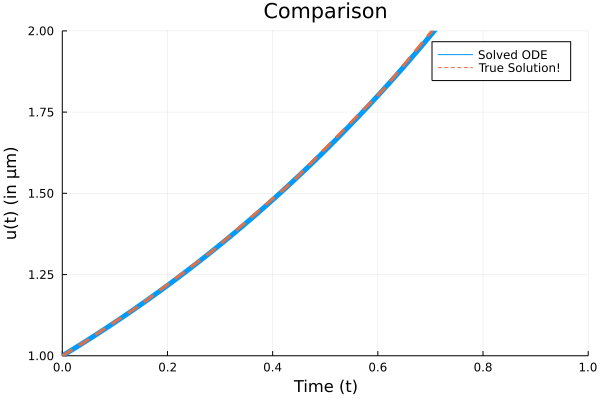

In [12]:
plot_(sol)

In [13]:
sol = solve(prob, saveat=0.1)

retcode: Success
Interpolation: 1st order linear
t: 11-element Vector{Float64}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0
u: 11-element Vector{Float64}:
 1.0
 1.102962785129292
 1.2165269512238264
 1.341783821227542
 1.4799379510586803
 1.6323162070542367
 1.8003833264979396
 1.9857565541587578
 2.190215812799762
 2.4157257420847684
 2.664456142481423

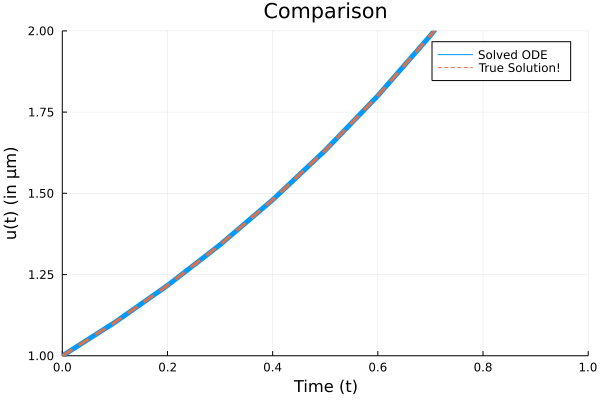

In [14]:
plot_(sol)

In [15]:
sol = solve(prob, saveat=[0.3, 0.5, 0.9])

retcode: Success
Interpolation: 1st order linear
t: 3-element Vector{Float64}:
 0.3
 0.5
 0.9
u: 3-element Vector{Float64}:
 1.341783821227542
 1.6323162070542367
 2.4157257420847684

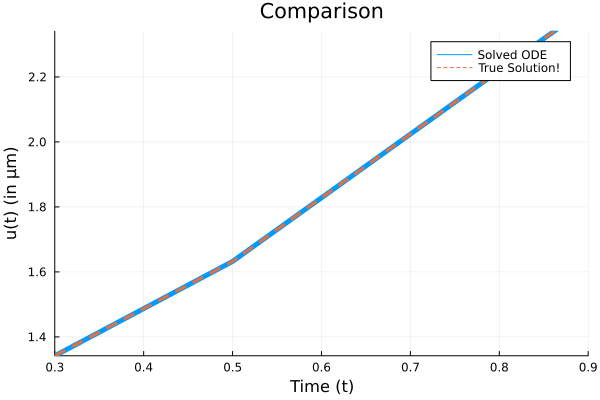

In [16]:
plot_(sol)

In [17]:
sol = solve(prob,alg_hints=[:stiff],reltol=1e-8,abstol=1e-8)

retcode: Success
Interpolation: specialized 3rd order "free" stiffness-aware interpolation
t: 40-element Vector{Float64}:
 0.0
 0.0037796447300922718
 0.011537169421430477
 0.021200818993981744
 0.03389533584247419
 0.04893637571523146
 0.06656641027003432
 0.08636071869675774
 0.10816368531617238
 0.1316515980638848
 0.15660071448952628
 0.18274632239199398
 0.20988482176522874
 ⋮
 0.6882457883933107
 0.7186433027830677
 0.7490408171728246
 0.7794383315625815
 0.8098358459523384
 0.8402333603420953
 0.8706308747318522
 0.9010283891216091
 0.931425903511366
 0.9618234179011229
 0.9922209322908798
 1.0
u: 40-element Vector{Float64}:
 1.0
 1.0037109203132695
 1.0113705852436008
 1.0209941429803713
 1.0337752876635982
 1.0491262219997348
 1.0674099238187476
 1.0883181297043607
 1.1118223341354392
 1.1377112468198252
 1.1658712949910226
 1.1961300605769714
 1.2283688183332142
 ⋮
 1.963013656724142
 2.022370698574231
 2.083522561567944
 2.146523516990141
 2.211429477165959
 2.27829804508169

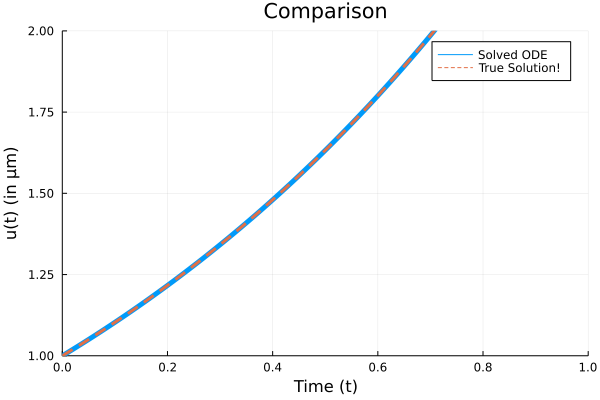

In [18]:
plot_(sol)